In [147]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('uncleaned_final.csv')
df

,Unnamed: 0,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,...,Operating Income,Operating Expense,Other Operating Expenses,Depreciation And Amortization In Income Statement,Depreciation Income Statement,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue,Ticker
0,2025-06-30,-4.564935e+08,0.345514,7.795930e+10,2.077680e+10,2.744300e+10,2.057866e+11,7.663810e+10,4.919510e+10,-1.852430e+10,...,4.683240e+10,2.748217e+11,1.857335e+11,2.744300e+10,2.744300e+10,3.216541e+11,2.057866e+11,5.274407e+11,5.274407e+11,TATASTEEL.NS
1,2025-03-31,4.494300e+08,0.300000,6.563660e+10,1.300810e+10,2.725030e+10,5.280240e+11,6.713470e+10,3.988440e+10,-9.942000e+09,...,3.419720e+10,-5.151300e+09,-2.653615e+11,2.725030e+10,2.725030e+10,2.904590e+10,5.280240e+11,5.570699e+11,5.570699e+11,TATASTEEL.NS
2,2024-12-31,-3.785700e+08,0.300000,6.171500e+10,3.266400e+09,2.569190e+10,2.393044e+11,6.045310e+10,3.476120e+10,-1.804090e+10,...,3.334300e+10,2.596654e+11,1.774190e+11,2.569190e+10,2.569190e+10,2.930084e+11,2.393044e+11,5.323128e+11,5.323128e+11,TATASTEEL.NS
3,2024-09-30,5.427000e+07,0.300000,6.714380e+10,8.334500e+09,2.596740e+10,2.394306e+11,6.732470e+10,4.135730e+10,-1.971400e+10,...,3.544530e+10,2.600214e+11,1.749381e+11,2.596740e+10,2.596740e+10,2.954667e+11,2.394306e+11,5.348973e+11,5.348973e+11,TATASTEEL.NS
4,2024-06-30,-1.073790e+09,0.300000,7.046890e+10,9.596100e+09,2.535430e+10,2.242297e+11,6.688960e+10,4.153530e+10,-1.776710e+10,...,4.159040e+10,2.783034e+11,1.918702e+11,2.535430e+10,2.535430e+10,3.198938e+11,2.242297e+11,5.441235e+11,5.441235e+11,TATASTEEL.NS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,2025-06-30,4.627263e+07,0.236181,2.474420e+09,1.590090e+09,4.510800e+08,2.390570e+09,2.670340e+09,2.219260e+09,-1.378500e+08,...,1.818770e+09,6.099030e+09,1.716910e+09,4.510800e+08,4.510800e+08,7.917800e+09,2.390570e+09,1.030837e+10,1.030837e+10,MEDANTA.NS
645,2025-03-31,-8.526877e+07,0.240261,2.332120e+09,1.014000e+09,4.925400e+08,2.136190e+09,1.977220e+09,1.484680e+09,-1.503000e+08,...,1.610280e+09,5.566000e+09,1.717000e+09,4.925400e+08,4.925400e+08,7.176280e+09,2.136190e+09,9.312470e+09,9.312470e+09,MEDANTA.NS
646,2024-12-31,-8.336805e+06,0.244409,2.571700e+09,1.429070e+09,4.841600e+08,2.292040e+09,2.537590e+09,2.053430e+09,-1.627500e+08,...,1.927600e+09,5.214720e+09,1.430960e+09,4.841600e+08,4.841600e+08,7.142320e+09,2.292040e+09,9.434360e+09,9.434360e+09,MEDANTA.NS
647,2024-09-30,-1.691406e+07,0.277644,2.525960e+09,1.308440e+09,4.943000e+08,2.279820e+09,2.465040e+09,1.970740e+09,-1.597500e+08,...,1.849500e+09,5.436230e+09,1.575780e+09,4.943000e+08,4.943000e+08,7.285730e+09,2.279820e+09,9.565550e+09,9.565550e+09,MEDANTA.NS


In [37]:
f = [
    'Special Income Charges',
    'Reconciled Cost Of Revenue', 
    'Total Revenue',
    'Tax Provision',
    'EBIT',
    'EBITDA',
    'Pretax Income',
    'Net Interest Income',
    'Basic EPS',
    'Operating Expense',
    'Net Income',  # Target variable
    'Ticker'
]

In [39]:
curr = df[[df.columns[0]]+f].copy()

In [41]:
curr

,Unnamed: 0,Special Income Charges,Reconciled Cost Of Revenue,Total Revenue,Tax Provision,EBIT,EBITDA,Pretax Income,Net Interest Income,Basic EPS,Operating Expense,Net Income,Ticker
0,2025-06-30,-1.321200e+09,2.057866e+11,5.274407e+11,1.059720e+10,4.919510e+10,7.663810e+10,3.067080e+10,-1.852430e+10,1.67,2.748217e+11,2.077680e+10,TATASTEEL.NS
1,2025-03-31,-1.626300e+09,5.280240e+11,5.570699e+11,9.988100e+09,3.988440e+10,6.713470e+10,2.199690e+10,-9.942000e+09,NaN,-5.151300e+09,1.300810e+10,TATASTEEL.NS
2,2024-12-31,-1.261900e+09,2.393044e+11,5.323128e+11,1.376540e+10,3.476120e+10,6.045310e+10,1.672030e+10,-1.804090e+10,0.26,2.596654e+11,3.266400e+09,TATASTEEL.NS
3,2024-09-30,1.809000e+08,2.394306e+11,5.348973e+11,1.405490e+10,4.135730e+10,6.732470e+10,2.164330e+10,-1.971400e+10,0.67,2.600214e+11,8.334500e+09,TATASTEEL.NS
4,2024-06-30,-3.579300e+09,2.242297e+11,5.441235e+11,1.458250e+10,4.153530e+10,6.688960e+10,2.376820e+10,-1.776710e+10,0.77,2.783034e+11,9.596100e+09,TATASTEEL.NS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,2025-06-30,1.959200e+08,2.390570e+09,1.030837e+10,4.915900e+08,2.219260e+09,2.670340e+09,2.081410e+09,-1.378500e+08,5.92,6.099030e+09,1.590090e+09,MEDANTA.NS
645,2025-03-31,-3.549000e+08,2.136190e+09,9.312470e+09,3.206000e+08,1.484680e+09,1.977220e+09,1.334380e+09,-1.503000e+08,NaN,5.566000e+09,1.014000e+09,MEDANTA.NS
646,2024-12-31,-3.411000e+07,2.292040e+09,9.434360e+09,4.621000e+08,2.053430e+09,2.537590e+09,1.890680e+09,-1.627500e+08,5.32,5.214720e+09,1.429070e+09,MEDANTA.NS
647,2024-09-30,-6.092000e+07,2.279820e+09,9.565550e+09,5.028100e+08,1.970740e+09,2.465040e+09,1.810990e+09,-1.597500e+08,4.87,5.436230e+09,1.308440e+09,MEDANTA.NS


In [43]:
curr.set_index(curr.columns[0], inplace=True)

In [45]:
curr

,Special Income Charges,Reconciled Cost Of Revenue,Total Revenue,Tax Provision,EBIT,EBITDA,Pretax Income,Net Interest Income,Basic EPS,Operating Expense,Net Income,Ticker
Unnamed: 0,,,,,,,,,,,,
2025-06-30,-1.321200e+09,2.057866e+11,5.274407e+11,1.059720e+10,4.919510e+10,7.663810e+10,3.067080e+10,-1.852430e+10,1.67,2.748217e+11,2.077680e+10,TATASTEEL.NS
2025-03-31,-1.626300e+09,5.280240e+11,5.570699e+11,9.988100e+09,3.988440e+10,6.713470e+10,2.199690e+10,-9.942000e+09,NaN,-5.151300e+09,1.300810e+10,TATASTEEL.NS
2024-12-31,-1.261900e+09,2.393044e+11,5.323128e+11,1.376540e+10,3.476120e+10,6.045310e+10,1.672030e+10,-1.804090e+10,0.26,2.596654e+11,3.266400e+09,TATASTEEL.NS
2024-09-30,1.809000e+08,2.394306e+11,5.348973e+11,1.405490e+10,4.135730e+10,6.732470e+10,2.164330e+10,-1.971400e+10,0.67,2.600214e+11,8.334500e+09,TATASTEEL.NS
2024-06-30,-3.579300e+09,2.242297e+11,5.441235e+11,1.458250e+10,4.153530e+10,6.688960e+10,2.376820e+10,-1.776710e+10,0.77,2.783034e+11,9.596100e+09,TATASTEEL.NS
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-30,1.959200e+08,2.390570e+09,1.030837e+10,4.915900e+08,2.219260e+09,2.670340e+09,2.081410e+09,-1.378500e+08,5.92,6.099030e+09,1.590090e+09,MEDANTA.NS
2025-03-31,-3.549000e+08,2.136190e+09,9.312470e+09,3.206000e+08,1.484680e+09,1.977220e+09,1.334380e+09,-1.503000e+08,NaN,5.566000e+09,1.014000e+09,MEDANTA.NS
2024-12-31,-3.411000e+07,2.292040e+09,9.434360e+09,4.621000e+08,2.053430e+09,2.537590e+09,1.890680e+09,-1.627500e+08,5.32,5.214720e+09,1.429070e+09,MEDANTA.NS


In [55]:
ticker_counts = curr['Ticker'].value_counts()
N = 5
more_than_N = ticker_counts[ticker_counts > N]
print(more_than_N)
less_than_N = ticker_counts[ticker_counts < N]
print(less_than_N)

Ticker
ZYDUSLIFE.NS    10
Name: count, dtype: int64
Ticker
PGHH.NS    4
Name: count, dtype: int64


In [57]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, 2025-06-30 to 2024-06-30
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Special Income Charges      424 non-null    float64
 1   Reconciled Cost Of Revenue  564 non-null    float64
 2   Total Revenue               649 non-null    float64
 3   Tax Provision               649 non-null    float64
 4   EBIT                        569 non-null    float64
 5   EBITDA                      569 non-null    float64
 6   Pretax Income               649 non-null    float64
 7   Net Interest Income         647 non-null    float64
 8   Basic EPS                   520 non-null    float64
 9   Operating Expense           644 non-null    float64
 10  Net Income                  649 non-null    float64
 11  Ticker                      649 non-null    object 
dtypes: float64(11), object(1)
memory usage: 65.9+ KB


In [61]:
#to check if for any company any one feature is missing for all the rows of that compnay

# Feature columns excluding 'Ticker'
feature_columns = curr.columns.difference(['Ticker'])

# Dictionary to hold results per feature
tickers_missing_all = {}

# Check each feature column for tickers where all values are missing
for col in feature_columns:
    all_missing = curr.groupby('Ticker')[col].apply(lambda x: x.isnull().all())
    tickers_missing_all[col] = all_missing[all_missing].index.tolist()

# Print the result
for feature, tickers in tickers_missing_all.items():
    print(f"Tickers with all missing values for feature '{feature}': {tickers}")


Tickers with all missing values for feature 'Basic EPS': []
Tickers with all missing values for feature 'EBIT': ['AXISBANK.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'CANBK.NS', 'FEDERALBNK.NS', 'ICICIBANK.NS', 'IDFCFIRSTB.NS', 'INDIANB.NS', 'INDUSINDBK.NS', 'KOTAKBANK.NS', 'PFC.NS', 'PNB.NS', 'RECLTD.NS', 'SBIN.NS', 'UNIONBANK.NS', 'YESBANK.NS']
Tickers with all missing values for feature 'EBITDA': ['AXISBANK.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'CANBK.NS', 'FEDERALBNK.NS', 'ICICIBANK.NS', 'IDFCFIRSTB.NS', 'INDIANB.NS', 'INDUSINDBK.NS', 'KOTAKBANK.NS', 'PFC.NS', 'PNB.NS', 'RECLTD.NS', 'SBIN.NS', 'UNIONBANK.NS', 'YESBANK.NS']
Tickers with all missing values for feature 'Net Income': []
Tickers with all missing values for feature 'Net Interest Income': []
Tickers with all missing values for feature 'Operating Expense': ['ICICIBANK.NS']
Tickers with all missing values for feature 'Pretax Income': []
Tickers with all missing values for feature 'Reconciled Cost Of Revenue': ['AXISBANK.NS', '

In [63]:
# Combine all tickers with all-missing values across columns into a single set
all_missing_tickers = set()

for tickers in tickers_missing_all.values():
    all_missing_tickers.update(tickers)

# Convert the set to a sorted list
all_missing_tickers_list = sorted(all_missing_tickers)

print("All tickers with complete missing data in at least one feature column:")
print(all_missing_tickers_list)


All tickers with complete missing data in at least one feature column:
['ABBOTINDIA.BO', 'ADANIPOWER.NS', 'AJANTPHARM.BO', 'APLAPOLLO.NS', 'ATUL.NS', 'AXISBANK.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'CANBK.NS', 'CLEAN.NS', 'COALINDIA.NS', 'EICHERMOT.NS', 'EXIDEIND.NS', 'FEDERALBNK.NS', 'HCLTECH.NS', 'ICICIBANK.NS', 'IDFCFIRSTB.NS', 'INDIANB.NS', 'INDUSINDBK.NS', 'INDUSTOWER.NS', 'JBCHEPHARM.NS', 'JSWENERGY.NS', 'KOTAKBANK.NS', 'LAURUSLABS.NS', 'LTIM.NS', 'LTTS.NS', 'M&M.NS', 'MANKIND.NS', 'MARICO.NS', 'MARUTI.NS', 'MPHASIS.NS', 'NATCOPHARM.NS', 'OFSS.NS', 'PERSISTENT.NS', 'PFC.NS', 'PNB.NS', 'POWERGRID.NS', 'RATNAMANI.NS', 'RECLTD.NS', 'RELIANCE.NS', 'SBIN.NS', 'SRF.NS', 'STLTECH.NS', 'SUMICHEM.NS', 'TATAELXSI.NS', 'TEJASNET.NS', 'TORNTPOWER.NS', 'UNIONBANK.NS', 'VBL.NS', 'WIPRO.NS', 'YESBANK.NS']


In [65]:
# Remove rows corresponding to the tickers in all_missing_tickers_list
curr_filtered = curr[~curr['Ticker'].isin(all_missing_tickers_list)].copy()

print(f"Original dataframe shape: {curr.shape}")
print(f"Filtered dataframe shape: {curr_filtered.shape}")


Original dataframe shape: (649, 12)
Filtered dataframe shape: (394, 12)


In [67]:
curr_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 2025-06-30 to 2024-06-30
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Special Income Charges      350 non-null    float64
 1   Reconciled Cost Of Revenue  394 non-null    float64
 2   Total Revenue               394 non-null    float64
 3   Tax Provision               394 non-null    float64
 4   EBIT                        394 non-null    float64
 5   EBITDA                      394 non-null    float64
 6   Pretax Income               394 non-null    float64
 7   Net Interest Income         392 non-null    float64
 8   Basic EPS                   315 non-null    float64
 9   Operating Expense           394 non-null    float64
 10  Net Income                  394 non-null    float64
 11  Ticker                      394 non-null    object 
dtypes: float64(11), object(1)
memory usage: 40.0+ KB


In [83]:
def interpolate_grouped(df, group_col):
    def interpolate_and_fill(series):
        series = series.interpolate(method='linear', limit_direction='both')
        series = series.ffill()
        series = series.bfill()
        return series
    
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        df[col] = df.groupby(group_col)[col].transform(interpolate_and_fill)
    return df


In [87]:
curr_interpolated = interpolate_grouped(curr_filtered.copy(), 'Ticker')

curr_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 2025-06-30 to 2024-06-30
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Special Income Charges      394 non-null    float64
 1   Reconciled Cost Of Revenue  394 non-null    float64
 2   Total Revenue               394 non-null    float64
 3   Tax Provision               394 non-null    float64
 4   EBIT                        394 non-null    float64
 5   EBITDA                      394 non-null    float64
 6   Pretax Income               394 non-null    float64
 7   Net Interest Income         394 non-null    float64
 8   Basic EPS                   394 non-null    float64
 9   Operating Expense           394 non-null    float64
 10  Net Income                  394 non-null    float64
 11  Ticker                      394 non-null    object 
dtypes: float64(11), object(1)
memory usage: 40.0+ KB


In [91]:
# curr_interpolated.to_csv('cleanedData.csv')

In [93]:
curr_interpolated

,Special Income Charges,Reconciled Cost Of Revenue,Total Revenue,Tax Provision,EBIT,EBITDA,Pretax Income,Net Interest Income,Basic EPS,Operating Expense,Net Income,Ticker
Unnamed: 0,,,,,,,,,,,,
2025-06-30,-1.321200e+09,2.057866e+11,5.274407e+11,1.059720e+10,4.919510e+10,7.663810e+10,3.067080e+10,-1.852430e+10,1.670,2.748217e+11,2.077680e+10,TATASTEEL.NS
2025-03-31,-1.626300e+09,5.280240e+11,5.570699e+11,9.988100e+09,3.988440e+10,6.713470e+10,2.199690e+10,-9.942000e+09,0.965,-5.151300e+09,1.300810e+10,TATASTEEL.NS
2024-12-31,-1.261900e+09,2.393044e+11,5.323128e+11,1.376540e+10,3.476120e+10,6.045310e+10,1.672030e+10,-1.804090e+10,0.260,2.596654e+11,3.266400e+09,TATASTEEL.NS
2024-09-30,1.809000e+08,2.394306e+11,5.348973e+11,1.405490e+10,4.135730e+10,6.732470e+10,2.164330e+10,-1.971400e+10,0.670,2.600214e+11,8.334500e+09,TATASTEEL.NS
2024-06-30,-3.579300e+09,2.242297e+11,5.441235e+11,1.458250e+10,4.153530e+10,6.688960e+10,2.376820e+10,-1.776710e+10,0.770,2.783034e+11,9.596100e+09,TATASTEEL.NS
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-30,1.959200e+08,2.390570e+09,1.030837e+10,4.915900e+08,2.219260e+09,2.670340e+09,2.081410e+09,-1.378500e+08,5.920,6.099030e+09,1.590090e+09,MEDANTA.NS
2025-03-31,-3.549000e+08,2.136190e+09,9.312470e+09,3.206000e+08,1.484680e+09,1.977220e+09,1.334380e+09,-1.503000e+08,5.620,5.566000e+09,1.014000e+09,MEDANTA.NS
2024-12-31,-3.411000e+07,2.292040e+09,9.434360e+09,4.621000e+08,2.053430e+09,2.537590e+09,1.890680e+09,-1.627500e+08,5.320,5.214720e+09,1.429070e+09,MEDANTA.NS


In [123]:

# List of features to normalize (exclude Ticker)
features_to_normalize = [
    'Special Income Charges', 'Reconciled Cost Of Revenue', 'Total Revenue', 'Tax Provision',
    'EBIT', 'EBITDA', 'Pretax Income', 'Net Interest Income',
    'Basic EPS', 'Operating Expense', 'Net Income'
]

# Fit scaler and transform data
scaler = StandardScaler()

# Assuming your dataframe is curr or curr_interpolated
data_to_scale = curr_interpolated[features_to_normalize]

# Perform scaling
data_scaled = scaler.fit_transform(data_to_scale)

# Convert back to dataframe
curr_normalized = curr_interpolated.copy()
curr_normalized[features_to_normalize] = data_scaled

# Check normalized data stats
curr_normalized[features_to_normalize].describe()
# curr_normalized


,Special Income Charges,Reconciled Cost Of Revenue,Total Revenue,Tax Provision,EBIT,EBITDA,Pretax Income,Net Interest Income,Basic EPS,Operating Expense,Net Income
count,394.000000,3.940000e+02,3.940000e+02,394.000000,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,394.000000
mean,0.000000,-2.705112e-17,9.017040e-18,0.000000,1.803408e-17,-9.017040e-18,1.803408e-17,-1.352556e-17,-1.803408e-17,5.410224e-17,0.000000
std,1.001271,1.001271e+00,1.001271e+00,1.001271,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271
min,-8.798383,-7.384858e-01,-7.528761e-01,-1.542977,-9.626676e-01,-7.637732e-01,-3.317962e+00,-7.171791e+00,-3.372422e-01,-2.976589e+00,-3.622620
25%,0.035538,-4.542218e-01,-4.799140e-01,-0.473311,-5.175467e-01,-5.527282e-01,-4.013782e-01,8.391304e-02,-2.022728e-01,-4.286533e-01,-0.339035
50%,0.121589,-3.416575e-01,-3.431490e-01,-0.327134,-3.475186e-01,-3.684261e-01,-2.684871e-01,2.292785e-01,-1.702799e-01,-3.022002e-01,-0.223716
75%,0.121589,-4.814591e-02,7.775785e-03,0.006952,7.607035e-02,1.076176e-01,8.633387e-02,2.675610e-01,-1.152237e-01,-2.494971e-02,0.051418
max,11.185524,6.699662e+00,6.275355e+00,6.239028,6.226577e+00,5.576776e+00,6.287034e+00,6.223776e+00,1.039684e+01,6.948054e+00,8.479702


In [125]:
curr_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 2025-06-30 to 2024-06-30
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Special Income Charges      394 non-null    float64
 1   Reconciled Cost Of Revenue  394 non-null    float64
 2   Total Revenue               394 non-null    float64
 3   Tax Provision               394 non-null    float64
 4   EBIT                        394 non-null    float64
 5   EBITDA                      394 non-null    float64
 6   Pretax Income               394 non-null    float64
 7   Net Interest Income         394 non-null    float64
 8   Basic EPS                   394 non-null    float64
 9   Operating Expense           394 non-null    float64
 10  Net Income                  394 non-null    float64
 11  Ticker                      394 non-null    object 
dtypes: float64(11), object(1)
memory usage: 40.0+ KB


In [127]:

# Assume curr_normalized is your dataframe

# Get unique tickers
unique_tickers = curr_normalized['Ticker'].unique()

# Split the tickers into train and test sets (80% train, 20% test)
train_tickers, test_tickers = train_test_split(unique_tickers, test_size=0.2, random_state=42)

# Split the dataframe based on these ticker sets
train_df = curr_normalized[curr_normalized['Ticker'].isin(train_tickers)].copy()
test_df = curr_normalized[curr_normalized['Ticker'].isin(test_tickers)].copy()

print(f'Training set contains {train_df.shape[0]} rows and {train_df["Ticker"].nunique()} tickers')
print(f'Testing set contains {test_df.shape[0]} rows and {test_df["Ticker"].nunique()} tickers')


Training set contains 314 rows and 62 tickers
Testing set contains 80 rows and 16 tickers


In [129]:
def create_nn_dataset(df, feature_cols, target_col, group_col):
    X, y = [], []
    # Process ticker-wise
    for ticker, group in df.groupby(group_col):
        group = group.reset_index(drop=True)
        for i in range(len(group) - 2):
            # Input: concatenate two consecutive rows' feature columns
            x_rows = group.loc[i:i+1, feature_cols].values.flatten()
            # Target: target_col value of the next row (i+2)
            y_val = group.loc[i+2, target_col]
            X.append(x_rows)
            y.append(y_val)
    return np.array(X), np.array(y)

# Features include all 11 columns (includes Net Income in features as given)
input_features = [
    'Special Income Charges', 'Reconciled Cost Of Revenue', 'Total Revenue', 'Tax Provision',
    'EBIT', 'EBITDA', 'Pretax Income', 'Net Interest Income', 'Basic EPS', 'Operating Expense', 'Net Income'
]

target_feature = 'Net Income'

# Assuming train_df and test_df exist, create datasets
X_train, y_train = create_nn_dataset(train_df, input_features, target_feature, 'Ticker')
X_test, y_test = create_nn_dataset(test_df, input_features, target_feature, 'Ticker')

In [131]:
print('Train inputs shape:', X_train.shape)
print('Train targets shape:', y_train.shape)
print('Test inputs shape:', X_test.shape)
print('Test targets shape:', y_test.shape)

Train inputs shape: (190, 22)
Train targets shape: (190,)
Test inputs shape: (48, 22)
Test targets shape: (48,)


class FinancialNet(nn.Module):
    def __init__(self, input_size=22, hidden_sizes=[128, 64, 32], dropout_rate=0.3):
        super(FinancialNet, self).__init__()
        
        layers = []
        prev_size = input_size
        
        for hidden_size in hidden_sizes:
            layers.extend([
                nn.Linear(prev_size, hidden_size),
                nn.BatchNorm1d(hidden_size),
                nn.ReLU(),
                nn.Dropout(dropout_rate)
            ])
            prev_size = hidden_size
        
        layers.append(nn.Linear(prev_size, 1))
        self.network = nn.Sequential(*layers)
        self._initialize_weights()
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        return self.network(x)

class EarlyStopping:
    def __init__(self, patience=15, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = float('inf')
    
    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            return False
        else:
            self.counter += 1
            return self.counter >= self.patience



def train_model(X_train, y_train, X_test, y_test, epochs=200, batch_size=16, lr=0.001):
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    model = FinancialNet(input_size=X_train.shape[1])
    
    criterion = nn.MSELoss()
    optimizer_fn = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer_fn, mode='min', factor=0.5, patience=10, verbose=True
    )
    
    early_stopping = EarlyStopping(patience=15)
    
    train_losses = []
    test_losses = []
    
    best_model_state = None
    best_test_loss = float('inf')
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        
        for batch_X, batch_y in train_loader:
            optimizer_fn.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer_fn.step()
            train_loss += loss.item()
        
        model.eval()
        test_loss = 0.0
        
        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                test_loss += loss.item()
        
        avg_train_loss = train_loss / len(train_loader)
        avg_test_loss = test_loss / len(test_loader)
        
        train_losses.append(avg_train_loss)
        test_losses.append(avg_test_loss)
        
        scheduler.step(avg_test_loss)
        
        if avg_test_loss < best_test_loss:
            best_test_loss = avg_test_loss
            best_model_state = model.state_dict().copy()
        
        if (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.6f}, Test Loss: {avg_test_loss:.6f}')
        
        if early_stopping(avg_test_loss):
            print(f"Early stopping at epoch {epoch+1}")
            break
    
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return model, train_losses, test_losses

def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        X_test_tensor = torch.FloatTensor(X_test)
        predictions = model(X_test_tensor).numpy().flatten()
    
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    print(f"\nTest Metrics:")
    print(f"MSE: {mse:.6f}")
    print(f"RMSE: {rmse:.6f}")
    print(f"MAE: {mae:.6f}")
    print(f"R²: {r2:.6f}")
    
    return predictions, {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}




model, train_losses, test_losses = train_model(X_train, y_train, X_test, y_test)

In [155]:
# Simple feedforward network with one hidden layer
class BasicNet(nn.Module):
    def __init__(self, input_size=22, hidden_size=32):
        super(BasicNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Training function with live print updates
def train_basic_nn(X_train, y_train, epochs=50, batch_size=16, lr=0.001):
    model = BasicNet(input_size=X_train.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                             torch.tensor(y_train, dtype=torch.float32).unsqueeze(1))
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    for epoch in range(epochs):
        epoch_loss = 0
        model.train()
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * inputs.size(0)
        epoch_loss /= len(loader.dataset)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.6f}")
    
    return model

In [163]:
model = train_basic_nn(X_train, y_train, epochs=500)

Epoch 1/500 - Loss: 0.367884
Epoch 2/500 - Loss: 0.274343
Epoch 3/500 - Loss: 0.196713
Epoch 4/500 - Loss: 0.149563
Epoch 5/500 - Loss: 0.115260
Epoch 6/500 - Loss: 0.090203
Epoch 7/500 - Loss: 0.072202
Epoch 8/500 - Loss: 0.062160
Epoch 9/500 - Loss: 0.058006
Epoch 10/500 - Loss: 0.051436
Epoch 11/500 - Loss: 0.050354
Epoch 12/500 - Loss: 0.046446
Epoch 13/500 - Loss: 0.045053
Epoch 14/500 - Loss: 0.045688
Epoch 15/500 - Loss: 0.042400
Epoch 16/500 - Loss: 0.041520
Epoch 17/500 - Loss: 0.040330
Epoch 18/500 - Loss: 0.039868
Epoch 19/500 - Loss: 0.039313
Epoch 20/500 - Loss: 0.039923
Epoch 21/500 - Loss: 0.036710
Epoch 22/500 - Loss: 0.038323
Epoch 23/500 - Loss: 0.034871
Epoch 24/500 - Loss: 0.033880
Epoch 25/500 - Loss: 0.034857
Epoch 26/500 - Loss: 0.032793
Epoch 27/500 - Loss: 0.031301
Epoch 28/500 - Loss: 0.032969
Epoch 29/500 - Loss: 0.032209
Epoch 30/500 - Loss: 0.030717
Epoch 31/500 - Loss: 0.029560
Epoch 32/500 - Loss: 0.031804
Epoch 33/500 - Loss: 0.028508
Epoch 34/500 - Loss

In [165]:
def test_basic_nn(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        inputs = torch.tensor(X_test, dtype=torch.float32)
        predictions = model(inputs).squeeze().numpy()
    
    mse = mean_squared_error(y_test, predictions)
    print(f"Test MSE: {mse:.6f}")
    return predictions


In [167]:
preds = test_basic_nn(model, X_test, y_test)

Test MSE: 0.263555


In [169]:
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted')
    plt.grid(True, alpha=0.3)
    plt.show()

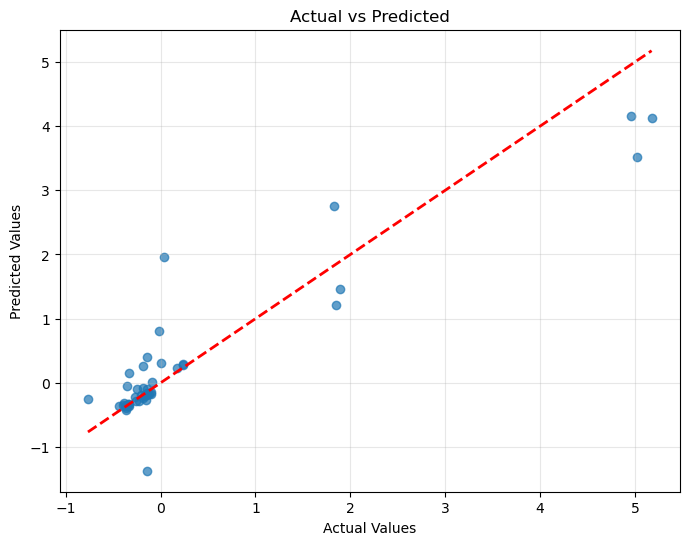

In [171]:
plot_predictions(y_test, preds)